<a href="https://colab.research.google.com/github/atopatalos/Repository_Project_dibimbing/blob/main/day24_NLP_Patalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction:**
Dear Kak Syalwa,
Please find the 3 example
my real tweet crawl (2nd example has issues), so I added 1st example as an additional.
The last example was from the material module.

1.   Example#1 : politics sentiment analysis, with three categories
2.   Example#2 : Tweet Crawl Analysis
3.   Example#3 ; The material



## **Example#1**

**1.1 Preparation, Load, EDA**

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# Libraries
import pandas as pd
import numpy as np
from string import punctuation
import re
import nltk
from nltk.corpus import twitter_samples
import random
nltk.download('stopwords')
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
df_tweet = pd.read_csv('/content/drive/MyDrive/dibimbing_ML/day23_NLP/twitter_comment_politics.csv')

In [149]:
df_tweet.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [150]:
def df_stats(data):
    print("------------- Size (Rows, Columns)-----------------")
    print("ROWS: {}".format(data.shape[0]))
    print("COLS: {}".format(data.shape[1]))
    print("---------Data Types---------------------")
    print(data.dtypes)
    print("---------NULL Values----------")
    print(data.isnull().sum())
    print("--------Duplicated Values---------")
    print("NUMBER OF DUPLICATED VALUES: {}".format(data.duplicated().sum()))


In [151]:
df_stats(df_tweet)

------------- Size (Rows, Columns)-----------------
ROWS: 162980
COLS: 2
---------Data Types---------------------
clean_text     object
category      float64
dtype: object
---------NULL Values----------
clean_text    4
category      7
dtype: int64
--------Duplicated Values---------
NUMBER OF DUPLICATED VALUES: 1


In [152]:
# Drop NaN values
df_tweet=df_tweet.dropna()

In [153]:
all_positive_tweets=df_tweet[df_tweet['category']==1]['clean_text']
all_neutral_tweets=df_tweet[df_tweet['category']==0]['clean_text']
all_negative_tweets=df_tweet[df_tweet['category']==-1]['clean_text']

In [154]:
# Visualization of all categories
total_positive_words = []
for sentence in all_positive_tweets:
    total_positive_words.append(sentence.count(' '))

total_negative_words = []
for sentence in all_negative_tweets:
    total_negative_words.append(sentence.count(' '))

total_neutral_words = []
for sentence in all_neutral_tweets:
    total_neutral_words.append(sentence.count(' '))

import plotly.graph_objects as go
import numpy as np

x0 = np.array(total_positive_words)
x1 = np.array(total_negative_words)
x2 = np.array(total_neutral_words)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, name = 'Positive'))
fig.add_trace(go.Histogram(x=x2, name = 'Neutral'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

<Axes: ylabel='count'>

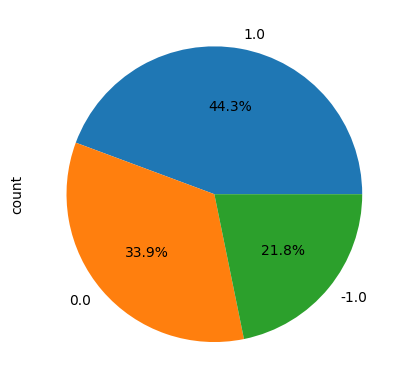

In [155]:
# Visualization  Pie Chart distribution of category labels
df_tweet['category'].value_counts().plot(kind='pie', autopct='%.1f%%')

**1.2 Data PreProcessing**

In [156]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [157]:
df_tweet=df_tweet.dropna(axis=0)

In [158]:
df_tweet.isnull().sum()

clean_text    0
category      0
dtype: int64

In [159]:
# Removing Stopwords
df_tweet['clean_text'] = df_tweet['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_english)]))

In [160]:
# removing punctuations
df_tweet['clean_text'] = df_tweet['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [161]:
df_tweet.head(5)

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


**1.3 Stemming The Words**

In [162]:
# Stemming using PorterStemmer class
stemmer = PorterStemmer()
def stemming(word):
    list1=[]
    for i in word.split():
        list1.append(stemmer.stem(i))
    return ' '.join(list1)

df_tweet['clean_text'] = df_tweet['clean_text'].apply(lambda x:stemming(x))

In [163]:
df_tweet.head(5)

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0


In [164]:
df_tweet['category'] = [2 if x == -1 else x for x in df_tweet['category']]

In [165]:
df_tweet['clean_text'][0]

'modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ'

**1.4 Tokenization & Padding**

In [166]:
# Function to perform tokenization and padding
def tokenization_padding(data, max_length):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(data.clean_text)
  word_index = tokenizer.word_index


  lines = pad_sequences(tokenizer.texts_to_sequences(data.clean_text),
                        maxlen = max_length)

  return word_index, lines

In [167]:

word_index, lines = tokenization_padding(df_tweet, max_length=200)
vocab_size = len(word_index) +1
print(f"Vocabulary Size: {vocab_size}")

df_tweet.clean_text = lines.tolist()
print(f"Number of lines: {df_tweet.clean_text}")

Vocabulary Size: 88555
Number of lines: 0         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                ...                        
162975    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
162976    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
162977    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
162978    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
162979    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: clean_text, Length: 162969, dtype: object


In [168]:
# Check the amount of each categories
df_tweet.category.value_counts()

category
1.0    72249
0.0    55211
2.0    35509
Name: count, dtype: int64

**1.5 Splitting Data Modelling**

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_tweet['clean_text'],df_tweet['category'],test_size=0.2,random_state=101)
X_train = np.vstack(X_train.values)
y_train = np.vstack(y_train.values)

X_val = np.vstack(X_test.values)
y_val = np.vstack(y_test.values)

In [170]:
X_train

array([[   0,    0,    0, ..., 6279, 7091,  630],
       [   0,    0,    0, ...,  985,  722,   41],
       [   0,    0,    0, ..., 1757, 1649, 1020],
       ...,
       [   0,    0,    0, ...,    2,   44,   31],
       [   0,    0,    0, ...,  156,    5, 1737],
       [   0,    0,    0, ...,   54, 1349, 1572]])

In [171]:
y_train

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [172]:
model_lstm = tf.keras.Sequential()

# Input layer
model_lstm.add(Input(shape=(None,)))

# Embedding layer
model_lstm.add(Embedding(input_dim=vocab_size,output_dim=200,trainable=True))

# LSTM layer
model_lstm.add(LSTM(64, activation='relu'))

# Fully connected layer
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.2))

# Output layer
model_lstm.add(Dense(3, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 200)         17711000  
                                                                 
 lstm_2 (LSTM)               (None, 64)                67840     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 17783195 (67.84 MB)
Trainable params: 17783195 (67.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
# Loss function : SparseCategoricalCrossEntropy
# Optimizer :  Adam
model_lstm.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model_lstm.fit(X_train, y_train,
                    epochs=2, batch_size=512,
                    verbose=1,shuffle=True,validation_data=(X_val,y_val))

Epoch 1/2
255/255 [==============================] - 501s 2s/step - loss: 0.6640 - accuracy: 0.7292 - val_loss: 0.4212 - val_accuracy: 0.8514
Epoch 2/2
255/255 [==============================] - 482s 2s/step - loss: 0.3599 - accuracy: 0.8750 - val_loss: 0.4060 - val_accuracy: 0.8537


In [193]:
# Perform predict with Validation data
predictions = model_lstm.predict(X_val)
print(history.history)

1019/1019 [==============================] - 71s 70ms/step
{'loss': [0.6640282273292542, 0.3599088191986084], 'accuracy': [0.7291505336761475, 0.8750143647193909], 'val_loss': [0.42124447226524353, 0.4059722125530243], 'val_accuracy': [0.8513836860656738, 0.8537154197692871]}


In [194]:
print("Evaluate on test data")
results = model_lstm.evaluate(X_val, y_val, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
255/255 [==============================] - 37s 146ms/step - loss: 0.4060 - accuracy: 0.8537
test loss, test acc: [0.4059720039367676, 0.8537154197692871]


## **Example#2**

In [258]:
!pip install snscrape

In [241]:
!pip install pandas

In [260]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
from tqdm.notebook import tqdm


In [264]:
query = "python"
scraper = sntwitter.TwitterSearchScraper(query)


In [265]:
for tweet in scraper.get_items():
  break

ERROR:snscrape.base:Error retrieving https://api.twitter.com/1.1/guest/activate.json: non-200 response (429)
CRITICAL:snscrape.base:4 requests to https://api.twitter.com/1.1/guest/activate.json failed, giving up.
CRITICAL:snscrape.base:Errors: non-200 response (429), non-200 response (429), non-200 response (429), non-200 response (429)


ScraperException: 4 requests to https://api.twitter.com/1.1/guest/activate.json failed, giving up.

In [259]:
query = "python"
tweets = []
limit = 100

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  #print(vars(tweet))
  #break
  if len(tweets) == limit:
    break
  else:
    tweets.append([tweet.date, tweet.username, tweet.content])




ERROR:snscrape.base:Error retrieving https://twitter.com/i/api/graphql/7jT5GT59P8IFjgxwqnEdQw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22python%22%2C%22count%22%3A20%2C%22product%22%3A%22Latest%22%2C%22withDownvotePerspective%22%3Afalse%2C%22withReactionsMetadata%22%3Afalse%2C%22withReactionsPerspective%22%3Afalse%7D&features=%7B%22rweb_lists_timeline_redesign_enabled%22%3Afalse%2C%22blue_business_profile_image_shape_enabled%22%3Afalse%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Afalse%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22tweetypie_unmention_optimization_enabled%22%3Atrue%2C%22vibe_api_enabled%22%3Atrue%2C%22responsive_web_edit_tweet_api_enabled%22%3Atrue%2C%22graphql_is_translatable_rweb_tweet_is_translatable_enabled%22%3Atrue%2C%22view_counts_ev

ScraperException: 4 requests to https://twitter.com/i/api/graphql/7jT5GT59P8IFjgxwqnEdQw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22python%22%2C%22count%22%3A20%2C%22product%22%3A%22Latest%22%2C%22withDownvotePerspective%22%3Afalse%2C%22withReactionsMetadata%22%3Afalse%2C%22withReactionsPerspective%22%3Afalse%7D&features=%7B%22rweb_lists_timeline_redesign_enabled%22%3Afalse%2C%22blue_business_profile_image_shape_enabled%22%3Afalse%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Afalse%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22tweetypie_unmention_optimization_enabled%22%3Atrue%2C%22vibe_api_enabled%22%3Atrue%2C%22responsive_web_edit_tweet_api_enabled%22%3Atrue%2C%22graphql_is_translatable_rweb_tweet_is_translatable_enabled%22%3Atrue%2C%22view_counts_everywhere_api_enabled%22%3Atrue%2C%22longform_notetweets_consumption_enabled%22%3Atrue%2C%22tweet_awards_web_tipping_enabled%22%3Afalse%2C%22freedom_of_speech_not_reach_fetch_enabled%22%3Afalse%2C%22standardized_nudges_misinfo%22%3Atrue%2C%22tweet_with_visibility_results_prefer_gql_limited_actions_policy_enabled%22%3Afalse%2C%22interactive_text_enabled%22%3Atrue%2C%22responsive_web_text_conversations_enabled%22%3Afalse%2C%22longform_notetweets_rich_text_read_enabled%22%3Afalse%2C%22longform_notetweets_inline_media_enabled%22%3Afalse%2C%22responsive_web_enhance_cards_enabled%22%3Afalse%2C%22responsive_web_twitter_blue_verified_badge_is_enabled%22%3Atrue%7D failed, giving up.

In [256]:
df = pdf.DataFrames(tweets, columns=['Date','user','tweet'])
print(df)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (<ipython-input-256-50714edb6fdf>, line 2)

In [272]:
#@title Twitter Auth Token

twitter_auth_token = 'b3cab867eda69c0a10202443e5f962bc65c36814'

In [273]:
!pip install pandas

In [274]:
!curl -sL https://deb.nodesource.com/setup_18.x | sudo -E bash -

2024-04-06 11:48:42 - Installing pre-requisites
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://deb.nodesource.com/node_20.x focal InRelease [4,583 B]
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Err:3 https://deb.nodesource.com/node_20.x focal InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY 1655A0AB68576280
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis

In [275]:
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg
!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_${NODE_MAJOR}.x focal main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y
!node -v


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://deb.nodesource.com/node_20.x focal InRelease [4,583 B]
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Err:3 https://deb.nodesource.com/node_20.x focal InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY 1655A0AB68576280
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package list

In [290]:
!pip install nvm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for contexttimer: filename=contexttimer-0.3.3-py3-none-any.whl size=5804 sha256=2dcbc9568a414806d479e8f2ae6103dc0b52624d304054c8167015fb0c4783ec
  Stored in directory: /root/.cache/pip/wheels/72/1c/da/cfd97201d88ccce214427fa84a5caeb91fef7c5a1b4c4312b4
Successfully built contexttimer


In [291]:
!nvm -v

usage: nvm [-h] [_ ...]
nvm: error: unrecognized arguments: -v


In [292]:
!nvm install 14

Arguments: ['install', '14']
🚀🚀🚀 Replace this message by putting your code into nvm.cli.nvm:main


In [293]:
!npm cache clean -f

npm WARN using --force I sure hope you know what you are doing.


In [294]:
!npm install -g n

/usr/bin/n -> /usr/lib/node_modules/n/bin/n
+ n@9.2.1
added 1 package from 2 contributors in 0.691s


In [295]:
!n stable

  installing : node-v20.12.1
       mkdir : /usr/local/n/versions/node/20.12.1
       fetch : https://nodejs.org/dist/v20.12.1/node-v20.12.1-linux-x64.tar.xz
############################################################################################# 100.0%
     copying : node/20.12.1
   installed : v20.12.1 (with npm 10.5.0)

Note: the node command changed location and the old location may be remembered in your current shell.
         old : /usr/bin/node
         new : /usr/local/bin/node
If "node --version" shows the old version then start a new shell, or reset the location hash with:
hash -r  (for bash, zsh, ash, dash, and ksh)
rehash   (for csh and tcsh)


In [307]:
!npx tweet-harvest

Tweet Harvest [v2.6.0]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78? What's your Twitter auth token? › *78? What's your Twitter auth token? › **78? What's your Twitter auth token? › ***78? What's your Twitter auth token? › ****78? What's your Twitter auth token? › *****78? What's your Twitter auth token? › ******78? What's your Twitter auth token? › *******78? What's your Twitter auth token? › ********78? What's your Twitter auth token? › *********78? What's your Twitter auth token? › **********78? What's your Twitter auth token? › ***********78? What's your Twitter auth token? › ************78? What's your Twitter auth token? › *************

In [314]:
df_tweet_euro = pd.read_csv('/content/tweets-data/#euro2024_06-04-2024_12-10-36.csv')
df_tweet_euro.head(119)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1776368329474626044,Fri Apr 05 21:56:27 +0000 2024,11,Anyone selling tickets to Euro 2024 any of the...,1776368329474626044,NaN,NaN,en,NaN,0,20,0,https://twitter.com/olishaan/status/1776368329...,1028423773937180672,olishaan
1,1776233953411657820,Fri Apr 05 13:02:29 +0000 2024,1346,Modrić trivela pass Casillas save #EURO2024 ht...,1776233953411657820,https://pbs.twimg.com/media/GKZy7aiWwAAFF1B.jpg,NaN,und,NaN,16,23,91,https://twitter.com/EURO2024/status/1776233953...,1469402426,EURO2024
2,1776528644396970105,Sat Apr 06 08:33:29 +0000 2024,27,Kuchta s Coufalem a jejich bezprostřední dojmy...,1776528644396970105,https://pbs.twimg.com/ext_tw_video_thumb/17765...,NaN,cs,Česká republika,1,2,0,https://twitter.com/adamkokousal/status/177652...,1641218890804895744,adamkokousal
3,1776264468797825394,Fri Apr 05 15:03:45 +0000 2024,1553,🇩🇪 Cologne #EURO2024 https://t.co/YsLeLiw4mS,1776264468797825394,https://pbs.twimg.com/media/GKaO7pTWQAAe4tO.jpg,NaN,it,NaN,15,66,96,https://twitter.com/EURO2024/status/1776264468...,1469402426,EURO2024
4,1776490020750106882,Sat Apr 06 06:00:01 +0000 2024,109,️ Kein Sommermärchen für stark übergewichtige ...,1776490020750106882,https://pbs.twimg.com/ext_tw_video_thumb/17764...,NaN,de,NaN,2,27,12,https://twitter.com/niusde_/status/17764900207...,1572928162211799045,niusde_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1774348320950898703,Sun Mar 31 08:09:40 +0000 2024,0,Euro 2024: England fans face heightened terror...,1774348320950898703,NaN,NaN,en,London,0,0,0,https://twitter.com/DPaisley_Noah/status/17743...,1675027192202272768,DPaisley_Noah
115,1775155964917731708,Tue Apr 02 13:38:57 +0000 2024,15,Battle lines are drawn for football's biggest ...,1775155964917731708,https://pbs.twimg.com/media/GKKe1CYXIAAKbd1.jpg,NaN,en,NaN,0,0,2,https://twitter.com/SonySportsNetwk/status/177...,508656152,SonySportsNetwk
116,1775474359559463305,Wed Apr 03 10:44:08 +0000 2024,49,Imagine this moment unfolding in the high-stak...,1775474359559463305,NaN,NaN,en,NaN,0,51,44,https://twitter.com/BTCFOOTBALLCUP/status/1775...,1762369379180920833,BTCFOOTBALLCUP
117,1775906590337519810,Thu Apr 04 15:21:40 +0000 2024,0,Anyone know what the rarest stickers are in th...,1775906590337519810,NaN,NaN,en,"Bellingham, Northumberland",0,0,2,https://twitter.com/MN0BLE/status/177590659033...,2310818852,MN0BLE


In [315]:
df_tweet_euro.shape

(119, 15)

In [316]:
df_tweet_euro.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [318]:

new_data = df_tweet_euro[['full_text']].copy()

# Add a new column 'Sentiment' with default value None
new_data['Sentiment'] = None

# Add a new column 'Id' with the index values
#new_data['Id'] = data.index

# Display the first few rows of the new DataFrame
print(new_data.head())


                                           full_text Sentiment
0  Anyone selling tickets to Euro 2024 any of the...      None
1  Modrić trivela pass Casillas save #EURO2024 ht...      None
2  Kuchta s Coufalem a jejich bezprostřední dojmy...      None
3       🇩🇪 Cologne #EURO2024 https://t.co/YsLeLiw4mS      None
4  ️ Kein Sommermärchen für stark übergewichtige ...      None


In [324]:
pd_euro = pd.read_csv('/content/tweets-data/euro_tweet.csv')

In [325]:
pd_euro

,full_text,Sentiment
0,Anyone selling tickets to Euro 2024 any of the...,1
1,Modrić trivela pass Casillas save #EURO2024 ht...,1
2,Kuchta s Coufalem a jejich bezprostřední dojmy...,0
3,🇩🇪 Cologne #EURO2024 https://t.co/YsLeLiw4mS,0
4,️ Kein Sommermärchen für stark übergewichtige ...,0
5,🇫🇷 #EURO2024 https://t.co/gpBRoOwBCu,0
6,#EURO2024 https://t.co/UP0u7VKfKz,0
7,Special #EURO2024 https://t.co/n8Jum7GEgx,0
8,Clutch David Villa #EURO2024 https://t.co/4HE2...,0
9,Who will be the two teams advancing to the nex...,0


In [326]:
pd_euro.columns


Index(['full_text', 'Sentiment'], dtype='object')

In [327]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [330]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    # Stem the tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Join the tokens back into a single string
    processed_text = ' '.join(stemmed_tokens)
    return processed_text

# Apply the preprocess_text function to the 'full_text' column
pd_euro['cleaned_text'] = pd_euro['full_text'].apply(preprocess_text)

# Display the first few rows of the DataFrame after preprocessing
pd_euro

,full_text,Sentiment,cleaned_text
0,Anyone selling tickets to Euro 2024 any of the...,1,anyon sell ticket euro 2024 ani match euro2024...
1,Modrić trivela pass Casillas save #EURO2024 ht...,1,modrić trivela pass casilla save euro2024
2,Kuchta s Coufalem a jejich bezprostřední dojmy...,0,kuchta s coufalem jejich bezprostřední dojmi p...
3,🇩🇪 Cologne #EURO2024 https://t.co/YsLeLiw4mS,0,cologn euro2024
4,️ Kein Sommermärchen für stark übergewichtige ...,0,kein sommermärchen für stark übergewichtig niu...
5,🇫🇷 #EURO2024 https://t.co/gpBRoOwBCu,0,euro2024
6,#EURO2024 https://t.co/UP0u7VKfKz,0,euro2024
7,Special #EURO2024 https://t.co/n8Jum7GEgx,0,special euro2024
8,Clutch David Villa #EURO2024 https://t.co/4HE2...,0,clutch david villa euro2024
9,Who will be the two teams advancing to the nex...,0,who will be two team advanc next round from th...


In [332]:
# Drop the 'full_text' column from the DataFrame
pd_euro = pd_euro.drop(columns=['full_text'])

pd_euro.head()

,Sentiment,cleaned_text
0,1,anyon sell ticket euro 2024 ani match euro2024...
1,1,modrić trivela pass casilla save euro2024
2,0,kuchta s coufalem jejich bezprostřední dojmi p...
3,0,cologn euro2024
4,0,kein sommermärchen für stark übergewichtig niu...


In [335]:
# Prepare the data
X = pd_euro['cleaned_text']
y = pd_euro['Sentiment']

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [336]:
X_train

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  60,  61,  62,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  47,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  76,  77,  78,  79,
         80,   2,  81,  82,  83,  84,   2,   6,  85,  86,  87,  88,   2,
         89,  90,   2,  91,   1,  92,  93,  94,  95],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1],


In [337]:
y_train

8     0
16    0
3     0
13    1
15    0
17    0
2     0
9     0
18    0
4     0
12    0
7     0
10    1
14    0
6     0
Name: Sentiment, dtype: int64

In [338]:
# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))  # Three output units for three sentiment classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 1.1162 - accuracy: 0.0769 - val_loss: 1.0646 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 127ms/step - loss: 1.0737 - accuracy: 0.8462 - val_loss: 0.9896 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 116ms/step - loss: 1.0326 - accuracy: 0.8462 - val_loss: 0.9080 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 68ms/step - loss: 0.9872 - accuracy: 0.8462 - val_loss: 0.8108 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 41ms/step - loss: 1.1573 - accuracy: 0.2500
Test Accuracy: 0.25
1/1 [==============================] - 0s 432ms/step


In [345]:


# Define the LSTM model architecture
model2 = Sequential()
model2.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128))
model2.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(3, activation='softmax'))  # Three output units for three sentiment classes

# Compile the model
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model2.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 1.0975 - accuracy: 0.5833 - val_loss: 1.0611 - val_accuracy: 0.6667
Epoch 2/5
1/1 [==============================] - 0s 119ms/step - loss: 1.0480 - accuracy: 0.9167 - val_loss: 1.0143 - val_accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 0s 129ms/step - loss: 0.9954 - accuracy: 0.9167 - val_loss: 0.9624 - val_accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 0s 109ms/step - loss: 0.9331 - accuracy: 0.9167 - val_loss: 0.9015 - val_accuracy: 0.6667
Epoch 5/5
1/1 [==============================] - 0s 31ms/step - loss: 1.1407 - accuracy: 0.2500
Test Loss: 1.1407, Test Accuracy: 0.2500


In [346]:
# Save the model to a file
model2.save('lstm_sentiment_model_euro.h5')

# Optionally, save the tokenizer as well for later use during inference
import pickle

with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

In [353]:
# Define a function to preprocess a single sentence
def preprocess_sentence(sentence):
    # Tokenize the sentence
    sentence = tokenizer.texts_to_sequences([sentence])
    # Pad the sequence
    sentence = pad_sequences(sentence, maxlen=X_train.shape[1])  # Use the maxlen of the training data
    return sentence

# Example new sentence
new_sentence = "The euro tickets will be expensive"

# Preprocess the new sentence
preprocessed_sentence = preprocess_sentence(new_sentence)

# Make predictions using the model
predictions = model2.predict(preprocessed_sentence)

# Convert predictions to sentiment labels
index_to_label = {1: 'positive', -1: 'negative', 0: 'neutral'}
predicted_sentiment = index_to_label[np.argmax(predictions)]

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment)

1/1 [==============================] - 0s 28ms/step
Predicted Sentiment: neutral


## **Example#3 (from session material)**

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
!pip install sastrawi -q

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests

# Load Dataset

In [200]:
data = pd.read_csv('/content/drive/MyDrive/dibimbing_ML/day24_NLP/opini_film.csv')
data.tail()

,Id,Sentiment,Text Tweet
195,196,positive,Fargo juga adaptasi dari film yang cukup berha...
196,197,positive,637.000 waw ini sangat keren flm horor dng jum...
197,198,positive,@filmziarah film yang tenang dan menghanyutkan...
198,199,positive,Film yg amat menarik. Kisah cinta & kesetiaan ...
199,200,positive,"Nntn @filmziarah , film bagus, ada kali 5 meni..."


# Text Processing
Langkah-langkah yang digunakan dalam melakukan text preprocessing adalah sebagai berikut:
- Cleaning text
- Lowercase
- Remove stopwords
- Stemming / Lemmatization
- Tokenization

## Cleaning Text and Lower Case

In [201]:
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove emojis
    emoji_pattern = re.compile(
        '['
        '\U0001F600-\U0001F64F'  # emoticons
        '\U0001F300-\U0001F5FF'  # symbols & pictographs
        '\U0001F680-\U0001F6FF'  # transport & map symbols
        '\U0001F700-\U0001F77F'  # alchemical symbols
        '\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
        '\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
        '\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
        '\U0001FA00-\U0001FA6F'  # Chess Symbols
        '\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
        '\U00002702-\U000027B0'  # Dingbats
        '\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, " ")

    # remove extra whitespace
    text = ' '.join(text.split())

    # lowercase
    text = text.lower()
    return text

## Remove Stopword

In [202]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# CONSTRUCT STOPWORDS
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

# create path url for each stopword
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword,
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# combine stopwords
stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_st = '''
yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw
ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih
ma dr ajaa tp akan bs bikin kta pas pdahl bnyak guys abis tnx
bang banget nang mas amat bangettt tjoy hemm haha sllu hrs lanjut
bgtu sbnrnya trjadi bgtu pdhl sm plg skrg
'''

# create dictionary with unique stopword
st_words = set(stopwords_l)
custom_stopword = set(custom_st.split())

# result stopwords
stop_words = st_words | custom_stopword
print(f'Stopwords: {list(stop_words)[:5]}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stopwords: ['ditujukan', 'ane', 'mengerjakan', 'tolong', 'emoh']


In [203]:
# remove stopwords
from nltk import word_tokenize, sent_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

## Stemming / Lemmatization

In [204]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

##  Tokenization


In [205]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

# Try Function

In [206]:
# example
text = 'Agak Laen ini emang agak lain, ya.. Bisa-bisanya jadi film Indonesia kedua terlaris 🙌🏼 #respect https://x.com/alnurulg/status/1761301921846140991?s=20'
print(f'Original text: \n{text}\n')

# cleaning text and lowercase
text = cleaning_text(text)
print(f'Cleaned text: \n{text}\n')

# remove stopwords
text = remove_stopword(text)
print(f'Removed stopword: \n{text}\n')

# stemming and lemmatization
text = stemming_and_lemmatization(text)
print(f'Stemmed and lemmatized: \n{text}\n')

# tokenization
text = tokenize(text)
print(f'Tokenized: \n{text}')

Original text: 
Agak Laen ini emang agak lain, ya.. Bisa-bisanya jadi film Indonesia kedua terlaris 🙌🏼 #respect https://x.com/alnurulg/status/1761301921846140991?s=20

Cleaned text: 
agak laen ini emang agak lain ya bisa bisanya jadi film indonesia kedua terlaris respect

Removed stopword: 
laen bisanya film indonesia terlaris respect

Stemmed and lemmatized: 
laen bisa film indonesia laris respect

Tokenized: 
['laen', 'bisa', 'film', 'indonesia', 'laris', 'respect']


# Implement in dataset

In [207]:
# pipeline preprocess
def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    output = remove_stopword(output)

    # # stemming and lemmatization
    # output = stemming_and_lemmatization(output)

    # # tokenization
    # output = tokenize(output)

    return output

In [208]:
# implement preprocessing
preprocessed_data = data.copy()
preprocessed_data['Text Tweet'] = data['Text Tweet'].map(preprocess)

In [209]:
preprocessed_data.tail()

,Id,Sentiment,Text Tweet
195,196,positive,fargo adaptasi film berhasil season 1 best
196,197,positive,637 000 waw keren flm horor dng penonton segin...
197,198,positive,film tenang menghanyutkan salut mbah ponco mem...
198,199,positive,film menarik kisah cinta kesetiaan disajikan k...
199,200,positive,nntn film bagus 5 menit penonton gak beranjak ...


In [210]:
preprocessed_data['Text Tweet'][1]

'film king arthur film jelek cerita king arthur'

## Save to CSV

In [211]:
df = pd.DataFrame(preprocessed_data)
csv_file_path = 'use_preprocessed_data.csv'
df.to_csv(csv_file_path, sep=';', index=False, header=True)

print(f'Data has been saved to {csv_file_path}')

Data has been saved to use_preprocessed_data.csv


In [212]:
# load dataset into pandas
import pandas as pd
data = pd.read_csv('/content/use_preprocessed_data.csv', sep=';')
data

,Id,Sentiment,Text Tweet
0,1,negative,jelek filmnya ernest gak mutu actingnya film s...
1,2,negative,film king arthur film jelek cerita king arthur
2,3,negative,film kasar bapaknya
3,4,negative,ga suka fast and furious menurutku jelek film
4,5,negative,ga tau film bilang perang perangan perang an r...
...,...,...,...
195,196,positive,fargo adaptasi film berhasil season 1 best
196,197,positive,637 000 waw keren flm horor dng penonton segin...
197,198,positive,film tenang menghanyutkan salut mbah ponco mem...
198,199,positive,film menarik kisah cinta kesetiaan disajikan k...


#LSTM

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Assuming your data is in a CSV file
file_path = '/content/use_preprocessed_data.csv'
df = pd.read_csv(file_path, sep=';')

# Assuming the 'Text Tweet' column contains the text data and 'Sentiment' contains labels
texts = df['Text Tweet'].tolist()
labels = df['Sentiment'].tolist()

# Tokenize the text data
max_words = 10000  # Adjust based on your dataset size
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to make them of equal length
max_sequence_length = 100  # Adjust based on your dataset and sequence length
data = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert labels to one-hot encoding
labels = pd.get_dummies(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=len(labels.columns), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/100
5/5 [==============================] - 9s 557ms/step - loss: 0.6938 - accuracy: 0.5063 - val_loss: 0.6893 - val_accuracy: 0.5500
Epoch 2/100
5/5 [==============================] - 2s 327ms/step - loss: 0.6796 - accuracy: 0.7750 - val_loss: 0.6795 - val_accuracy: 0.7250
Epoch 3/100
5/5 [==============================] - 1s 253ms/step - loss: 0.6608 - accuracy: 0.8438 - val_loss: 0.6674 - val_accuracy: 0.6250
Epoch 4/100
5/5 [==============================] - 2s 307ms/step - loss: 0.6271 - accuracy: 0.8687 - val_loss: 0.6485 - val_accuracy: 0.6500
Epoch 5/100
5/5 [==============================] - 2s 358ms/step - loss: 0.5719 - accuracy: 0.8938 - val_loss: 0.6174 - val_accuracy: 0.6750
Epoch 6/100
5/5 [==============================] - 1s 290ms/step - loss: 0.4857 - accuracy: 0.8813 - val_loss: 0.5654 - val_accuracy: 0.7750
Epoch 7/100
5/5 [==============================] - 1s 280ms/step - loss: 0.3656 - accuracy: 0.9625 - val_loss: 0.4898 - val_accuracy: 0.8250
Epoch 8/100
5

In [214]:
# Save the model to a file
model.save('lstm_sentiment_model.h5')

# Optionally, save the tokenizer as well for later use during inference
import pickle

with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

In [215]:
from keras.models import load_model
import pickle

# Load the model
loaded_model = load_model('lstm_sentiment_model.h5')

# Load the tokenizer
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    loaded_tokenizer = pickle.load(tokenizer_file)

# New sentence for testing
test_sentence = 'menonton bioskop bersama temanku, namun ia salah pilih film, film yang dia pilih horor yang menakutkan'
new_sentence = preprocess(test_sentence)
# Tokenize and pad the new sentence
new_sequence = loaded_tokenizer.texts_to_sequences([new_sentence])
new_data = pad_sequences(new_sequence, maxlen=max_sequence_length)

# Predict sentiment for the new sentence
predictions = loaded_model.predict(new_data)

# Get the predicted sentiment label
predicted_sentiment_label = labels.columns[predictions.argmax(axis=1)[0]]
print(f"preprocessing: {new_sentence}")
print(f"new_sequence: {new_sequence}")
print(f"new_data: {new_data}")
print(f"Predicted Sentiment: {predicted_sentiment_label}")

1/1 [==============================] - 0s 314ms/step
preprocessing: menonton bioskop temanku pilih film film pilih horor menakutkan
new_sequence: [[43, 19, 1, 1, 55, 650]]
new_data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  43  19   1   1  55 650]]
Predicted Sentiment: positive


# one hot encoding
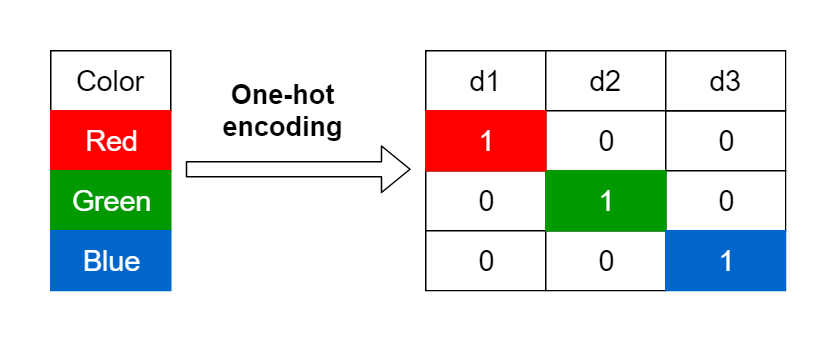